<a href="https://colab.research.google.com/github/ady909/Capstone-Project-Bike-Sharing-Demand-Prediction-/blob/main/Capstone_Project_Bike_Sharing_Demand_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project Title : Seoul Bike Sharing Demand Prediction

### Project Type - Regression

### Contribution - Individual

## Problem Description

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

##Attribute Information:

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
from google.colab import files
upload = files.upload()

Saving SeoulBikeData.csv to SeoulBikeData.csv


In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})


In [3]:
#loading data
bike_df = pd.read_csv("SeoulBikeData.csv" , encoding = "unicode_escape")

## Getting to know about data

In [4]:
#first 20 rows look
bike_df.head(n = 20)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#last 20 rows look
bike_df.tail(n = 20)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8740,30/11/2018,116,4,-0.5,71,0.4,1345,-5.1,0.00,0.0,0.0,Autumn,No Holiday,Yes
8741,30/11/2018,149,5,-0.7,66,0.5,1336,-6.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
8742,30/11/2018,293,6,-0.8,68,0.8,1322,-5.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8743,30/11/2018,750,7,-1.2,70,0.8,1351,-5.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8744,30/11/2018,1527,8,-1.5,68,1.1,1286,-6.6,0.02,0.0,0.0,Autumn,No Holiday,Yes
8745,30/11/2018,809,9,-0.4,57,0.6,1270,-7.8,0.45,0.0,0.0,Autumn,No Holiday,Yes
8746,30/11/2018,554,10,1.9,51,0.8,1029,-7.1,1.01,0.0,0.0,Autumn,No Holiday,Yes
8747,30/11/2018,642,11,5.3,43,1.8,1177,-6.2,1.38,0.0,0.0,Autumn,No Holiday,Yes
8748,30/11/2018,720,12,6.6,35,1.3,1409,-7.8,1.70,0.0,0.0,Autumn,No Holiday,Yes
8749,30/11/2018,740,13,7.1,24,2.8,1838,-12.1,1.83,0.0,0.0,Autumn,No Holiday,Yes


Data in consist of info about the bike rented on hourly bases from 01/12/2017 to 30/11/2018. Weather conditions are also taken into consideration.

In [6]:
#chcking dimensions of dataset
bike_df.shape

(8760, 14)

There are total 8760 data points , 13 features and one target output i.e. Rented Bike Count

In [7]:
#summary
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Numerical as well as categorical variables are present. There are no null values in any column.Date has datatype named object so we need to change it to date datatype.


In [8]:
#creating function to change data type of date
def get_date(Date):
  date_obj = dt.datetime.strptime(Date , "%d/%m/%Y")
  date_obj = pd.to_datetime(date_obj, format = "%Y-%m-%d")
  return date_obj


In [9]:
 #applying function
 bike_df["Date"] = bike_df["Date"].apply(get_date)

In [10]:
# extracting date, month and day of week
bike_df['Day'] = bike_df['Date'].apply(lambda x : x.day)
bike_df['Month'] = bike_df['Date'].apply(lambda x : x.month)
bike_df['Day_of_week'] = bike_df['Date'].dt.day_name()

bike_df= bike_df.drop("Date", axis= 1)

In [11]:
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Day_of_week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Friday


In [12]:
# checking for duplicate values
bike_df.duplicated().sum()

0

In [13]:
# checking for missing values
bike_df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
Day_of_week                  0
dtype: int64

There are no duplicate as  well as missing values.

##Exploratory Data Analysis

### Univariate Analysis

Let's analyse target variable Rented Bike Count  

In [14]:

bike_df["Rented Bike Count"].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

Let's see Distribution of Rented Bike Count

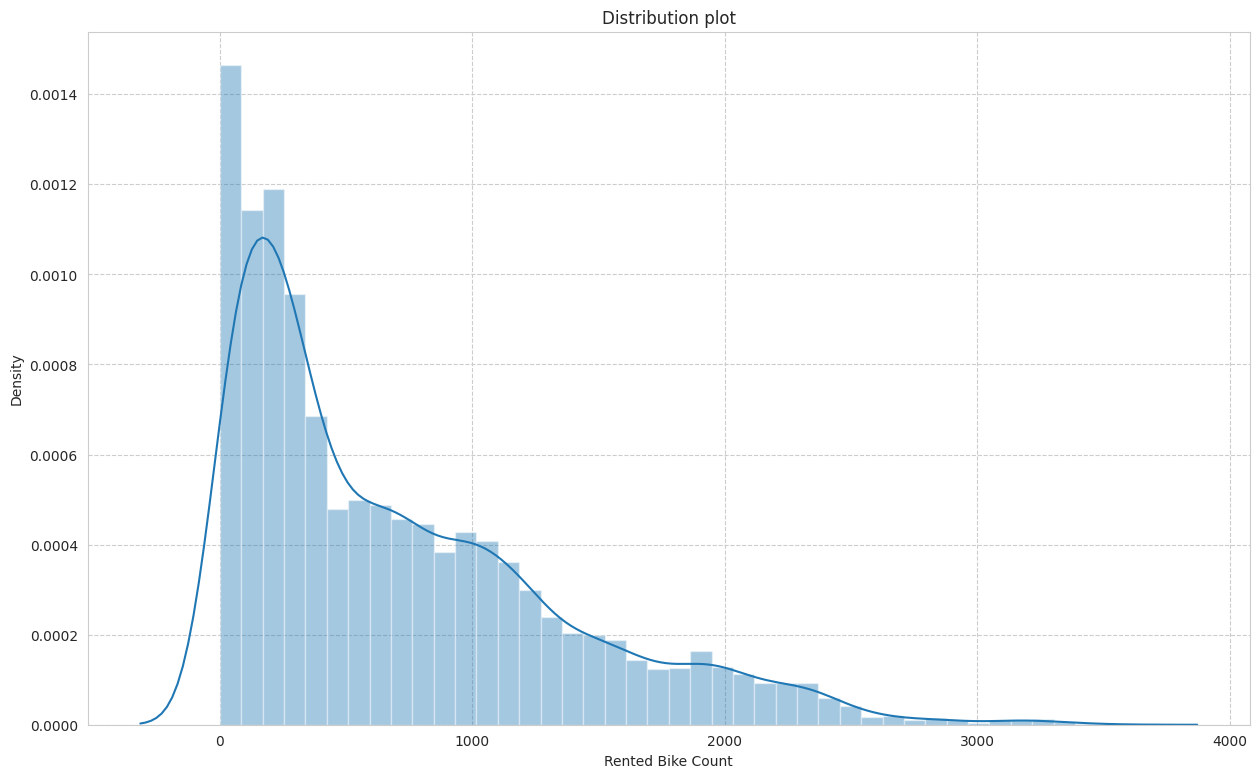

In [15]:
# distribution plot
plt.figure(figsize=(15,9))
sns.distplot(bike_df["Rented Bike Count"])
plt.title("Distribution plot");


In [16]:
#checking skewness score
bike_df["Rented Bike Count"].skew()

1.1534281773679014

Rented Bike Count is positively skewed and its skewness score is greater than +1 , so we need to apply transformaion technique to reduce its skewness.

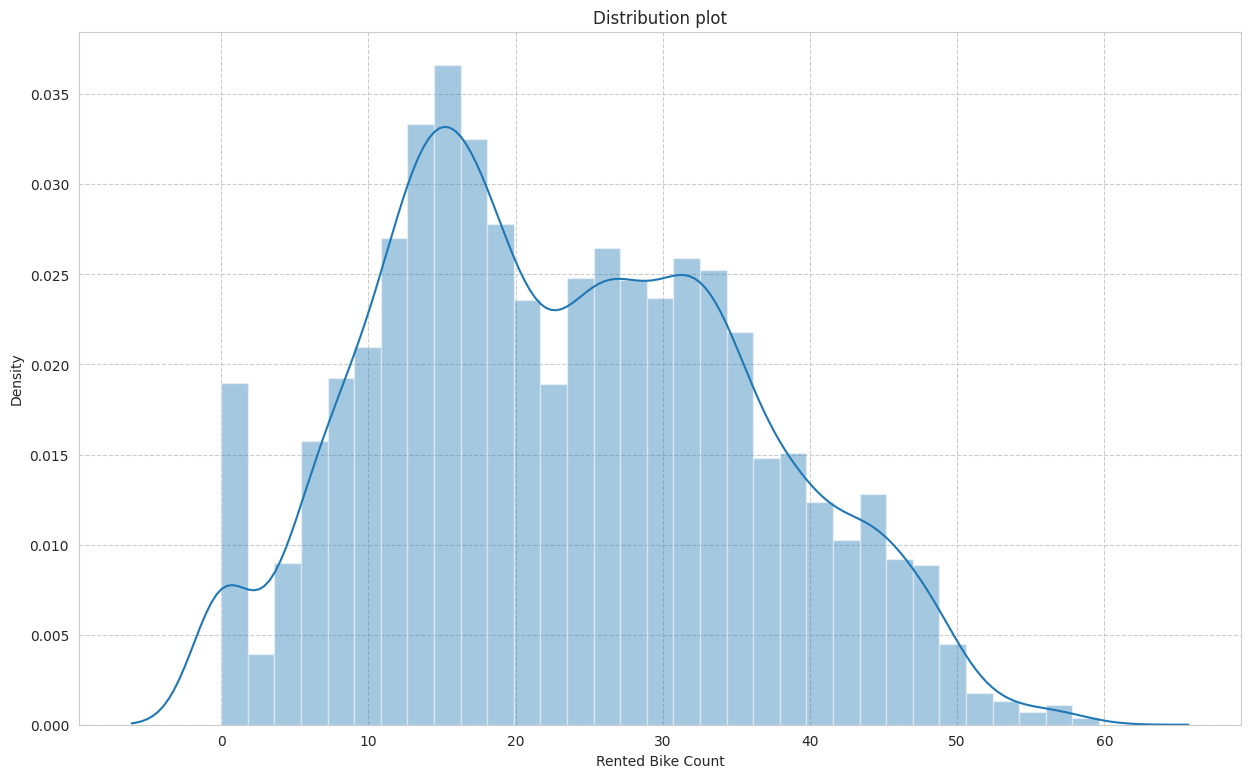

In [17]:
# applying square-root transformation
plt.figure(figsize=(15,9))
sns.distplot(np.sqrt(bike_df["Rented Bike Count"]))
plt.title("Distribution plot");

In [18]:
#checking skewness score
np.sqrt(bike_df["Rented Bike Count"]).skew()

0.237362090985412

looks Like almost normal distribution.

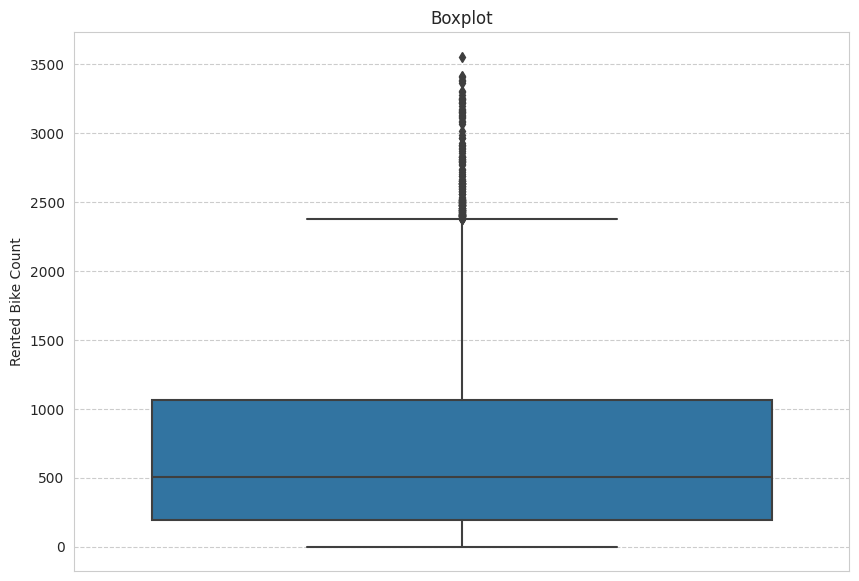

In [19]:
#boxplot for finding outliers
plt.figure(figsize=(10,7))
sns.boxplot( y = bike_df["Rented Bike Count"])
plt.title("Boxplot");

Median for 'Rented Bike Count' is 500 and we can see some outliers over there. So to remove them we have to use 'showfliers' parameter and set it to 'False'.

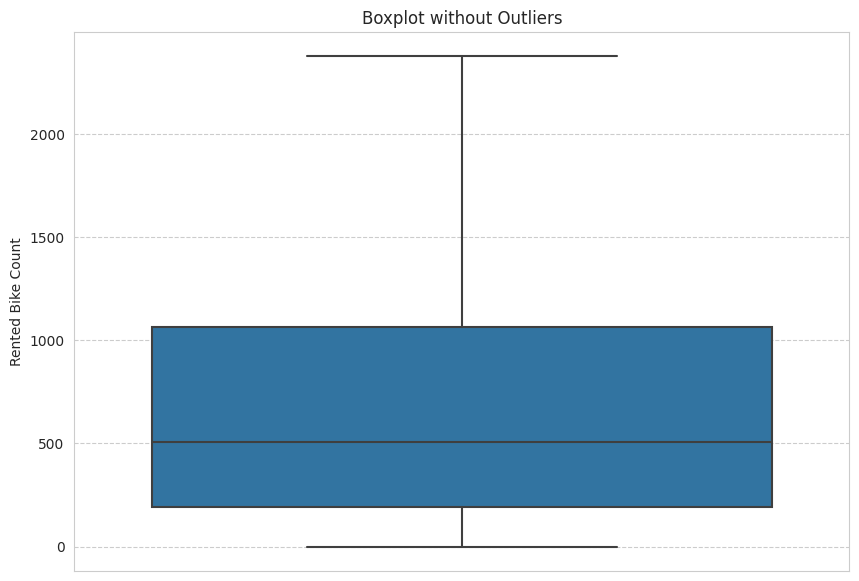

In [20]:
#boxplot
plt.figure(figsize=(10,7))
sns.boxplot( y = bike_df["Rented Bike Count"] , showfliers = False)
plt.title("Boxplot without Outliers");

## Independent Variables

### Numerical Variables


In [21]:
#making list of numerical variables
numerical_variables = list(bike_df.describe().columns[1:])
numerical_variables

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month']

In [22]:
#summary of numerical feature
bike_df[numerical_variables].describe()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,15.720548,6.526027
std,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,8.796749,3.448048
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,8.000000,4.000000
50%,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,16.000000,7.000000
75%,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,23.000000,10.000000
max,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,31.000000,12.000000


As these columns are numerical columns , we can use histogram visualisation to understand their distribution

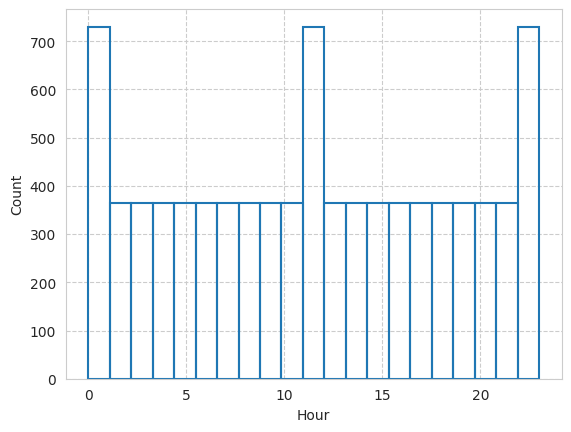

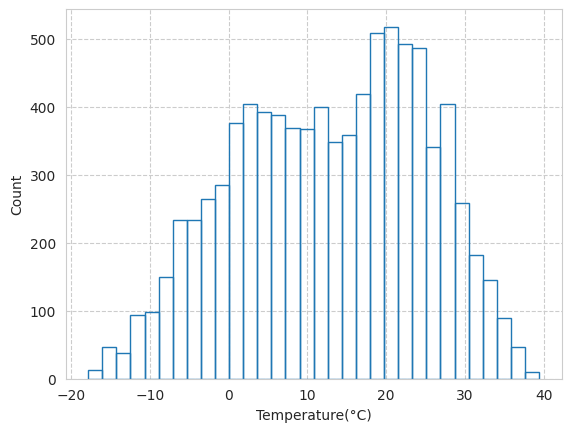

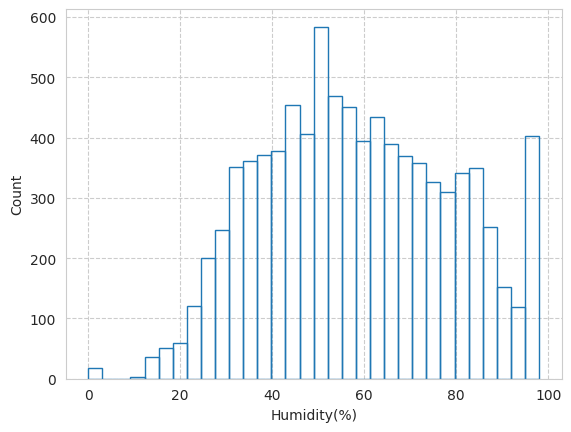

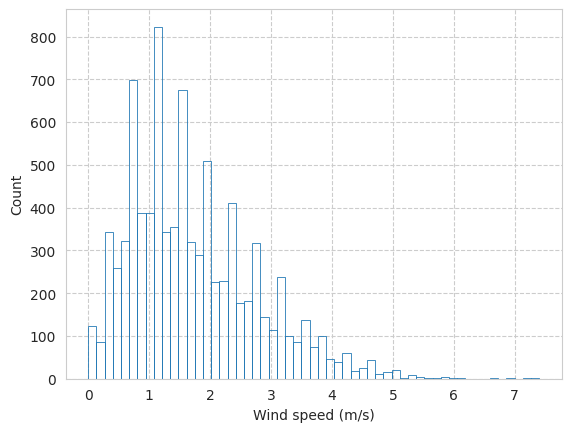

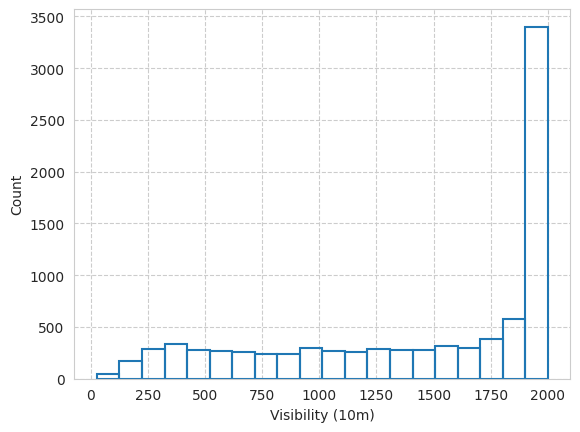

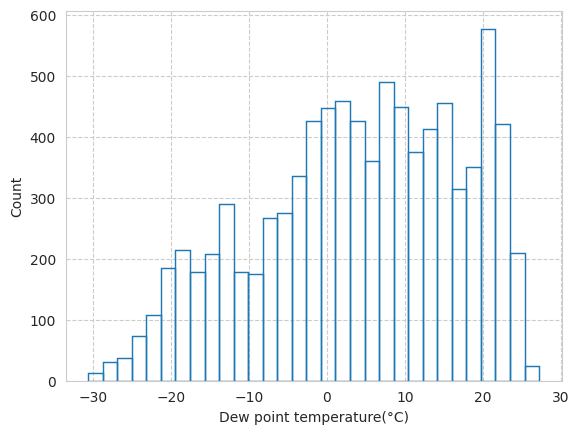

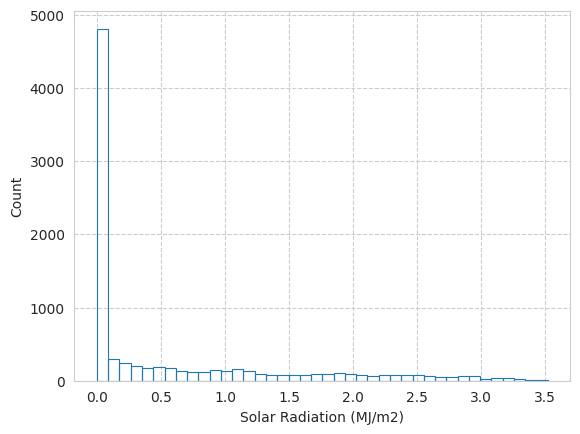

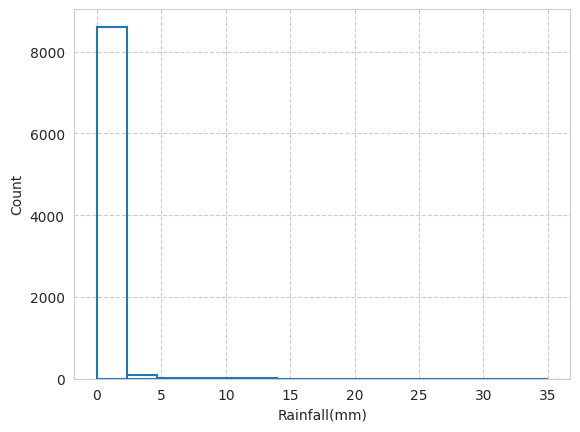

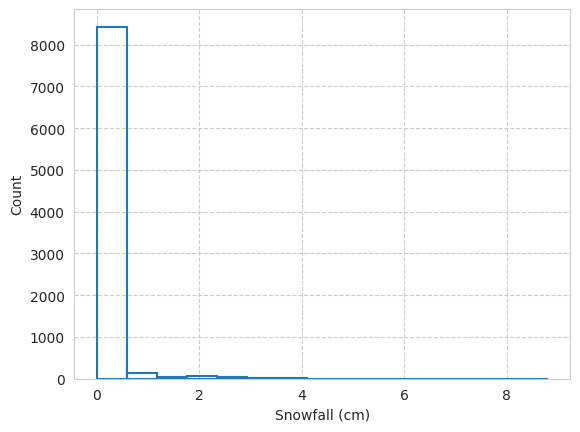

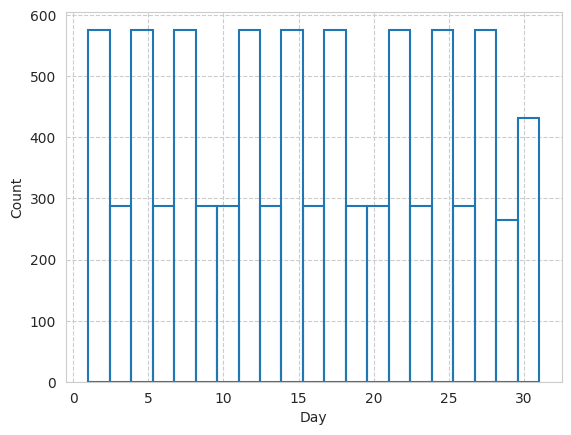

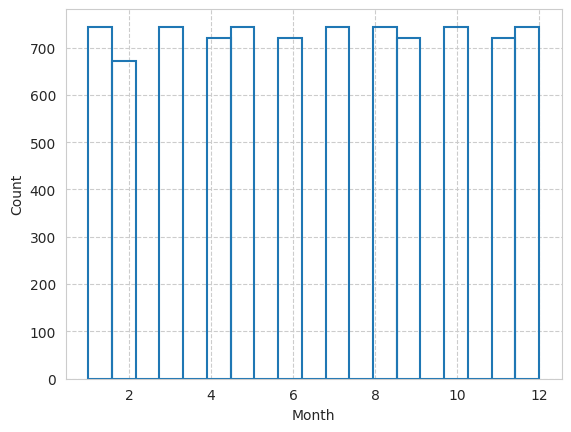

In [23]:
# histogram for each numerical feature count
for column in numerical_variables:
    num_feature = bike_df[column]
    sns.histplot(num_feature , fill = False)


    plt.show()

To find out outliers present in these features , we use Boxplot.

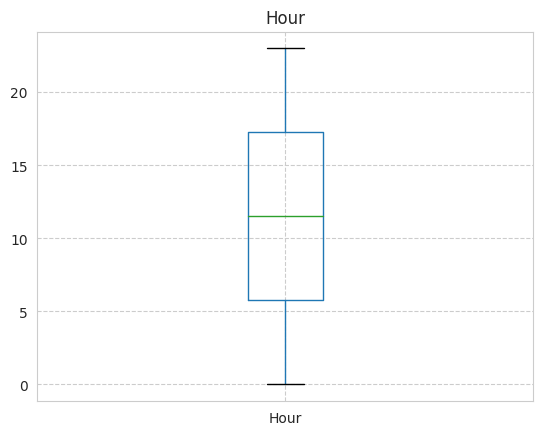

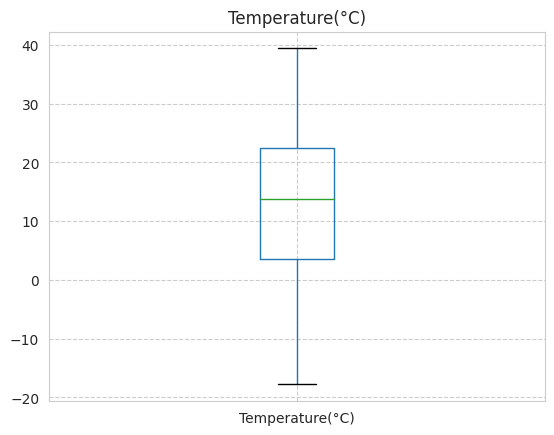

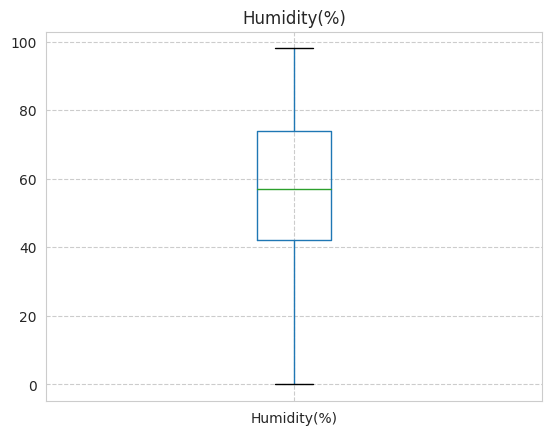

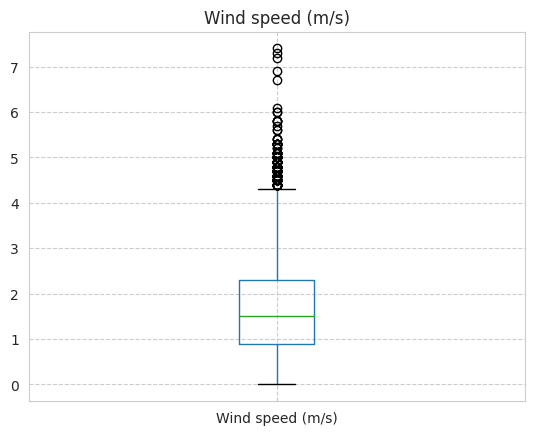

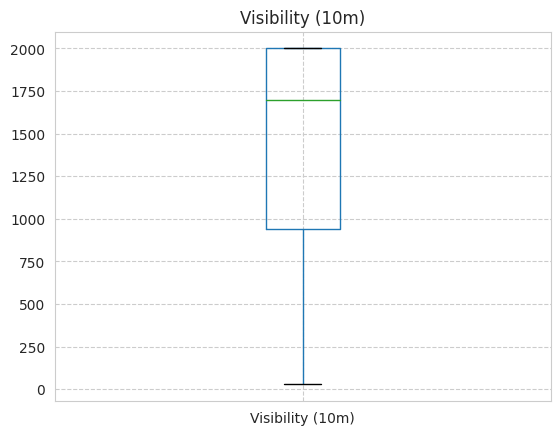

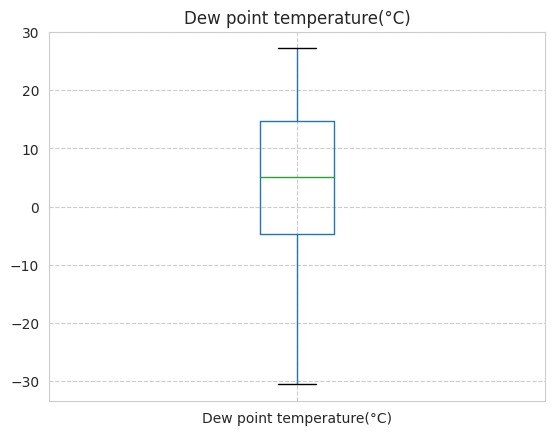

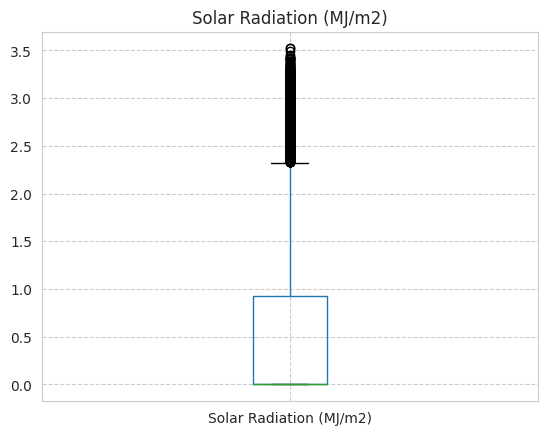

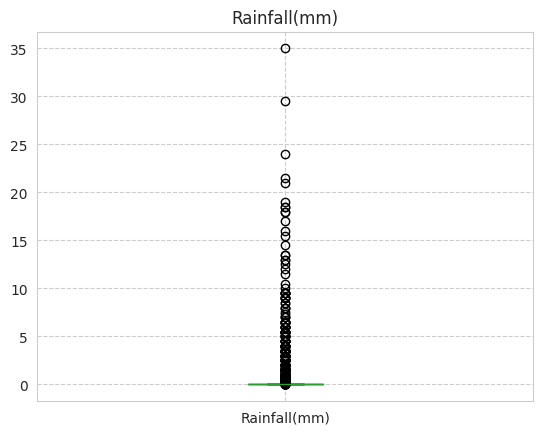

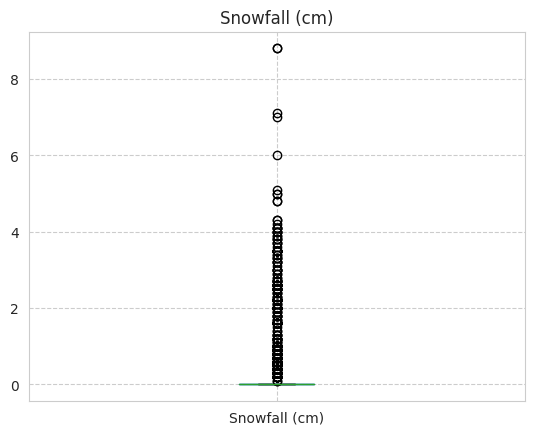

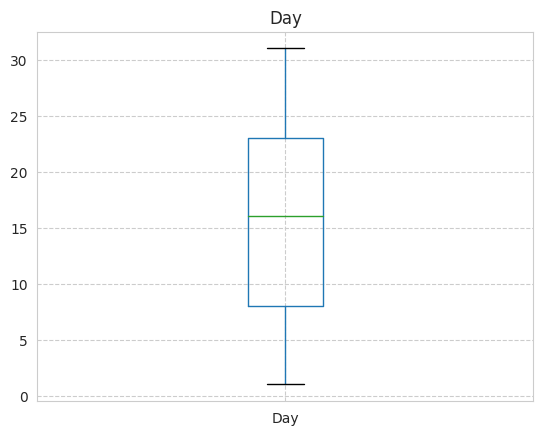

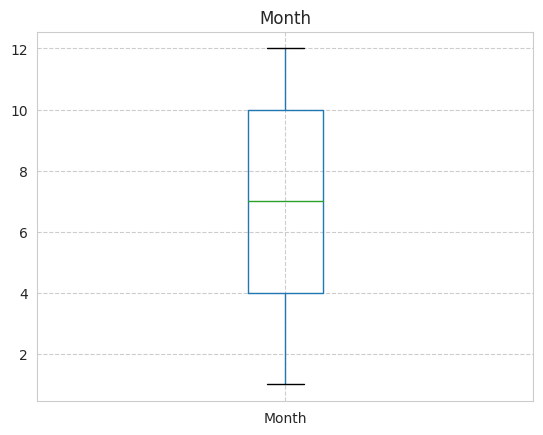

In [24]:
# boxplot for each numerical feature
for column in numerical_variables:
    figure = plt.figure()
    ax = figure.gca()
    bike_df.boxplot(column, ax = ax)
    ax.set_title(column)
plt.show()

Variables such as wind speed (m/s), solar radiation (mj/m2), rainfall(mm), snowfall (cm) has outliers as seen in the boxplot.